# **Natural Language Processing (NLP)**

## **Project: Trip Advisor Hotel Reviews**

- ## **Introduction**

Hotels play a crucial role in traveling, and with the increased access to information new pathways of selecting the best ones emerged. With this dataset, you can explore what makes a great hotel and maybe even use this model in your travels!

#### We will answer some questions, which are:
> * #### What is the distribution for each supervised learning and unsupervised learning?
> * #### What are the most frequent comment words in each rating?
> * #### What is the best model for each supervised learning and unsupervised learning?




## **About the dataset**
The dataset called **Trip Advisor Hotel Reviews**, and was downloaded from **Kaggle**, and contains more than 20K reviews.

You can find and download the dataset from [here](https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews)


# **Section 1: Supervised Learning**

# **Part 1: Text Preprocessing**

### Import libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from bs4 import BeautifulSoup
import math
import re
import random as rn
import string
import bert
import spacy
import joblib


from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, f1_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift, KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, SVMSMOTE, RandomOverSampler, BorderlineSMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTETomek


import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


import nltk
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, WhitespaceTokenizer
from nltk.corpus import stopwords, wordnet

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS 
from autocorrect import Speller
from collections import Counter


import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [2]:
df = pd.read_csv("tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


----

### Creating sample of the dataset

In [3]:
df_sample = df.sample(frac = 1, replace = False, random_state=42)
df_sample.head()

,Review,Rating
10726,not recommend hotel did reviewers actually sta...,1
14919,"barcelona rocks, stayed hotel jazz girlfriend ...",4
19098,ok hotel good location stayed night way beijin...,3
2450,great service nice pool ok beach lovely ground...,4
960,surprising treat spent weekend july 15/16 2006...,5


In [4]:
df_sample.shape

(20491, 2)

### Taking only positive (rating = 5) and negative (rating = 1 & 2) reviews

In [5]:
# df_sample = df_sample[(df_sample['Rating'] ==5) | (df_sample['Rating']==1) | (df_sample['Rating']== 2)][['Review','Rating']]
df_sample = df_sample[(df_sample['Rating'] ==5) | (df_sample['Rating']==1)][['Review','Rating']]

### Cleaning the reviews

In [6]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def clean_text(text):
    # lower text
    text = text.lower()
    
    # tokenize text and remove punctuations
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words
    stop = stopwords.words('english')
    stop.remove('not')
    stop.remove('but')
    text = [x for x in text if x not in stop]
    
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # pos tag text
    pos_tags = pos_tag(text)
    
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]

    # join all
    text = " ".join(text)
    
    return(text)



df_sample["Cleaned_Review"] = df_sample["Review"].apply(lambda x: clean_text(x))

repeated_chars = lambda x: re.sub('(.)\\1{2,}', '\\1', x)
df_sample['Cleaned_Review'] = df_sample.Cleaned_Review.map(repeated_chars)

df_sample = df_sample[df_sample['Cleaned_Review'].map(lambda x: x.isascii())]

#data cleaned
df_sample.head()

,Review,Rating,Cleaned_Review
10726,not recommend hotel did reviewers actually sta...,1,not recommend hotel reviewer actually stay hot...
960,surprising treat spent weekend july 15/16 2006...,5,surprising treat spend weekend july cartwright...
17525,fantastic stay affinia 50 stayed affinia 50 de...,5,fantastic stay affinia stay affinia december n...
13241,"great choice, stayed argonaut 7th 10th sepembe...",5,great choice stay argonaut sepember second leg...
12134,"treat good room glimpse bridge, thought room, ...",5,treat good room glimpse bridge think room impe...


### Making the dataframe more clear

In [7]:
df_sample = df_sample.reindex(columns=['Review', 'Cleaned_Review', 'Rating',])

df_sample.head()

,Review,Cleaned_Review,Rating
10726,not recommend hotel did reviewers actually sta...,not recommend hotel reviewer actually stay hot...,1
960,surprising treat spent weekend july 15/16 2006...,surprising treat spend weekend july cartwright...,5
17525,fantastic stay affinia 50 stayed affinia 50 de...,fantastic stay affinia stay affinia december n...,5
13241,"great choice, stayed argonaut 7th 10th sepembe...",great choice stay argonaut sepember second leg...,5
12134,"treat good room glimpse bridge, thought room, ...",treat good room glimpse bridge think room impe...,5


### Changing the number of ratings to positive (rating = 1) and negative (rating = 0)

In [8]:

df_sample['Rating'] = df_sample['Rating'].apply(lambda x: 1 if x == 5 else 0 )
df_sample['Sentiment_Supervised'] = df_sample['Rating'].apply(lambda x: 'Positive' if x == 1 else 'Negative')

df_sample.head(10)

,Review,Cleaned_Review,Rating,Sentiment_Supervised
10726,not recommend hotel did reviewers actually sta...,not recommend hotel reviewer actually stay hot...,0,Negative
960,surprising treat spent weekend july 15/16 2006...,surprising treat spend weekend july cartwright...,1,Positive
17525,fantastic stay affinia 50 stayed affinia 50 de...,fantastic stay affinia stay affinia december n...,1,Positive
13241,"great choice, stayed argonaut 7th 10th sepembe...",great choice stay argonaut sepember second leg...,1,Positive
12134,"treat good room glimpse bridge, thought room, ...",treat good room glimpse bridge think room impe...,1,Positive
18083,"great value money tegal sari lovely hotel, wif...",great value money tegal sari lovely hotel wife...,1,Positive
3505,great hotel perfect central location just came...,great hotel perfect central location come trip...,1,Positive
2751,beautiful just returned 5 night stay beach hot...,beautiful return night stay beach hotel experi...,1,Positive
1580,hope come chose hotel based location reviews t...,hope come chose hotel base location review tri...,1,Positive
6245,awesome hotel stayed luanna week 1 6. visit oa...,awesome hotel stay luanna week visit oahu hote...,1,Positive


### Distribution of each rating

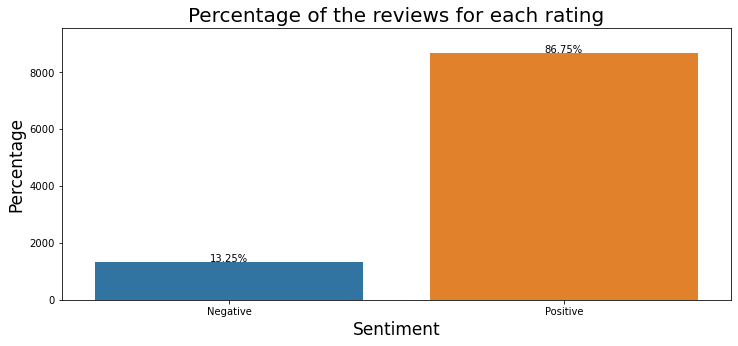

In [9]:
total = len(df_sample)
ax1 = plt.figure(figsize=(12,5))

g = sns.countplot(x='Sentiment_Supervised', data=df_sample)
g.set_title("Percentage of the reviews for each rating", fontsize=20)
g.set_xlabel("Sentiment", fontsize=17)
g.set_ylabel("Percentage", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1);

In [10]:
df_sample.Sentiment_Supervised.value_counts()

Positive    8693
Negative    1328
Name: Sentiment_Supervised, dtype: int64

### Most frequent comment words for each rating

In [11]:
Positive = df_sample[df_sample['Rating'] == 1]
Negative = df_sample[df_sample['Rating'] == 0]

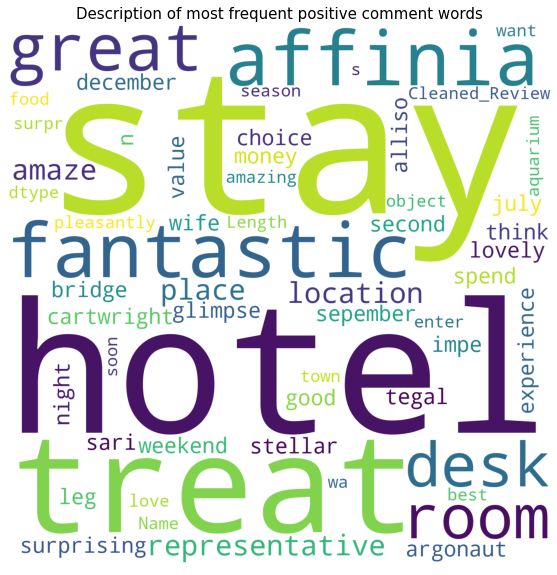

In [12]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'white', width = 1500, height = 1500).generate(str(Positive['Cleaned_Review']))
plt.title('Description of most frequent positive comment words', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

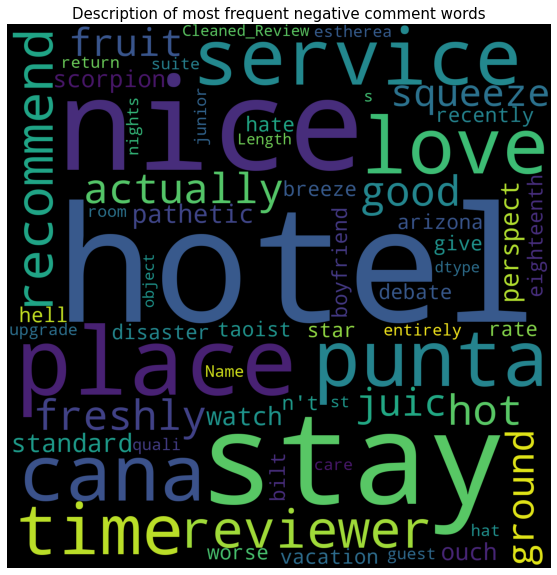

In [13]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'black', width = 1500, height = 1500).generate(str(Negative['Cleaned_Review']))
plt.title('Description of most frequent negative comment words', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

# **Part 2: Modeling**

### Splitting the data into train dataset and test dataset

In [14]:
X = df_sample.Cleaned_Review
y = df_sample.Sentiment_Supervised

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Initializing the models

In [15]:
std_slc = StandardScaler()

tvec = TfidfVectorizer()

knn = KNeighborsClassifier() 

lr = LogisticRegression()

sv = SVC()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

et = ExtraTreesClassifier()

xgbc = xgb.XGBClassifier()

cbc = CatBoostClassifier()

lgbm = lgb.LGBMClassifier()

mlp = MLPClassifier(hidden_layer_sizes=(8), max_iter=50, activation = 'relu', solver='adam')

* ### K-Nearest Neighbors (KNN) Classifier

In [16]:
params = { 'classifier__n_neighbors': list(range(1, 20)),'classifier__weights': ['uniform', 'distance']}

steps = [('victorizer', tvec),("ROS", RandomOverSampler()),('classifier', knn)]
pipeline = Pipeline(steps)

knn_rs = GridSearchCV(pipeline, param_grid=params, n_jobs = -1)

knn_rs.fit(X_train,y_train)

y_pred_knn_rs = knn_rs.predict(X_test)

print(knn_rs.best_score_)
print('\n')
print(knn_rs.best_params_)
print('\n')
print(classification_report(y_test, y_pred_knn_rs))

0.9137978509745597


{'classifier__n_neighbors': 1, 'classifier__weights': 'uniform'}


              precision    recall  f1-score   support

    Negative       0.72      0.58      0.65       253
    Positive       0.94      0.97      0.95      1752

    accuracy                           0.92      2005
   macro avg       0.83      0.78      0.80      2005
weighted avg       0.91      0.92      0.92      2005



<AxesSubplot:>

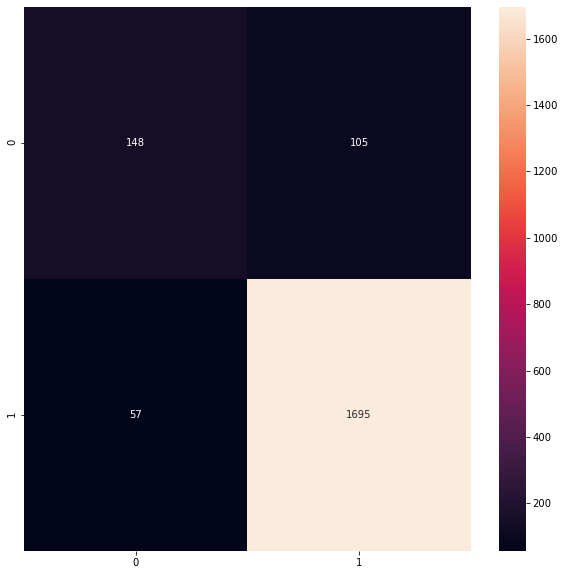

In [17]:
cm_knn_rs = confusion_matrix(y_test, y_pred_knn_rs)
sns.heatmap(cm_knn_rs, annot=True, fmt='1')

In [18]:
example = ['The first time I try to live there, and God willing, the last timeI came around the time of the crowd, the apartments and hotels, and I decided to take them 😭Give us a bridal room 🤣 The sofa is red, Bluetooth speakersThe bed is bad, the air-conditioner is exactly above the bed, its old type, but it killed me with a coldAnd there is an air conditioner above the TV. You imagine air conditioning in a small room ☹️The bathroom is opposite the bed, and the door is closed and does not lockThe bathroom is large and has a jacuzzi, but the drawback is that the sink is very close to the chair (the cabin) with difficulty for one to sit.It has a small fridge and kettleThe room does not have a mirror. How is a bridal room?The room is narrow in the sense of the word, and the poor bride is the one who rents itPictures I tried to adjust too much']
result = knn_rs.predict(example)

for i in result:
    if i == 0:
        print("Positive feedback")
  
    else:
        print("Negative feedback")


Negative feedback


* ### Logistic Regression Classifier

In [19]:
model_lr = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', lr)])

model_lr.fit(X_train,y_train)

y_pred_model_lr = model_lr.predict(X_test)

print(accuracy_score(y_test,y_pred_model_lr))
print('\n')
print(classification_report(y_test,y_pred_model_lr))

0.9875311720698254


              precision    recall  f1-score   support

    Negative       0.94      0.96      0.95       253
    Positive       0.99      0.99      0.99      1752

    accuracy                           0.99      2005
   macro avg       0.97      0.98      0.97      2005
weighted avg       0.99      0.99      0.99      2005



<AxesSubplot:>

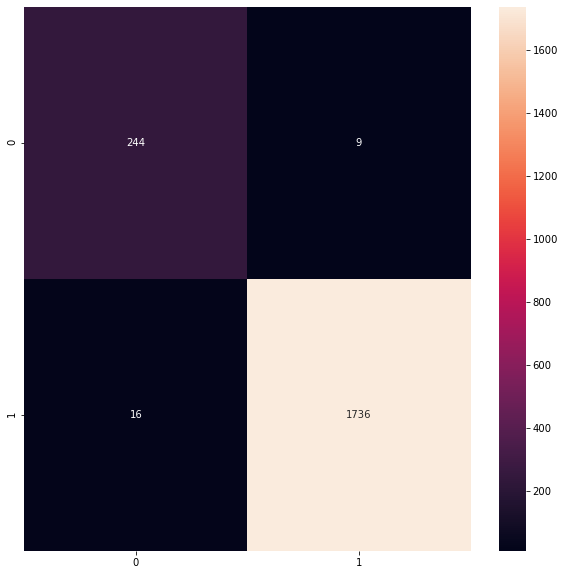

In [20]:
cm_model_lr = confusion_matrix(y_test, y_pred_model_lr)
sns.heatmap(cm_model_lr, annot=True, fmt='1')

> #### Write a review to test the model

In [21]:
example = ['The first time I try to live there, and God willing, the last timeI came around the time of the crowd, the apartments and hotels, and I decided to take them 😭Give us a bridal room 🤣 The sofa is red, Bluetooth speakersThe bed is bad, the air-conditioner is exactly above the bed, its old type, but it killed me with a coldAnd there is an air conditioner above the TV. You imagine air conditioning in a small room ☹️The bathroom is opposite the bed, and the door is closed and does not lockThe bathroom is large and has a jacuzzi, but the drawback is that the sink is very close to the chair (the cabin) with difficulty for one to sit.It has a small fridge and kettleThe room does not have a mirror. How is a bridal room?The room is narrow in the sense of the word, and the poor bride is the one who rents itPictures I tried to adjust too much']
result = model_lr.predict(example)

for i in result:
    if i == 0:
        print("Positive feedback")
  
    else:
        print("Negative feedback")

Negative feedback


* ### Support Vector Classifier

In [22]:
model_SVC = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', sv)])

model_SVC.fit(X_train,y_train)

y_pred_model_SVC = model_SVC.predict(X_test)

print(accuracy_score(y_test,y_pred_model_SVC))
print('\n')
print(classification_report(y_test,y_pred_model_SVC))

0.9845386533665835


              precision    recall  f1-score   support

    Negative       0.99      0.89      0.94       253
    Positive       0.98      1.00      0.99      1752

    accuracy                           0.98      2005
   macro avg       0.99      0.94      0.96      2005
weighted avg       0.98      0.98      0.98      2005



<AxesSubplot:>

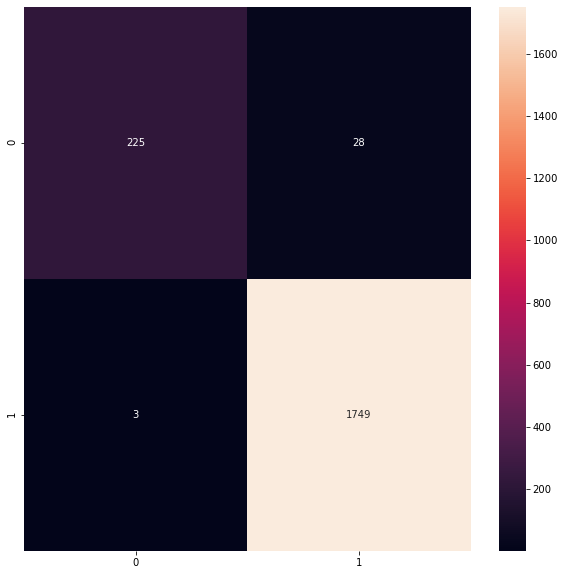

In [23]:
cm_model_SVC = confusion_matrix(y_test, y_pred_model_SVC)
sns.heatmap(cm_model_SVC, annot=True, fmt='1')

> #### Write a review to test the model

In [24]:
example = ['The first time I try to live there, and God willing, the last timeI came around the time of the crowd, the apartments and hotels, and I decided to take them 😭Give us a bridal room 🤣 The sofa is red, Bluetooth speakersThe bed is bad, the air-conditioner is exactly above the bed, its old type, but it killed me with a coldAnd there is an air conditioner above the TV. You imagine air conditioning in a small room ☹️The bathroom is opposite the bed, and the door is closed and does not lockThe bathroom is large and has a jacuzzi, but the drawback is that the sink is very close to the chair (the cabin) with difficulty for one to sit.It has a small fridge and kettleThe room does not have a mirror. How is a bridal room?The room is narrow in the sense of the word, and the poor bride is the one who rents itPictures I tried to adjust too much']
result = model_SVC.predict(example)

for i in result:
    if i == 0:
        print("Positive feedback")
  
    else:
        print("Negative feedback")

Negative feedback


* ### Decision Tree Classifier

In [25]:
model_dt = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', dt)])

model_dt.fit(X_train,y_train)

y_pred_model_dt = model_dt.predict(X_test)

print(accuracy_score(y_test,y_pred_model_dt))
print('\n')
print(classification_report(y_test,y_pred_model_dt))

0.9047381546134663


              precision    recall  f1-score   support

    Negative       0.61      0.70      0.65       253
    Positive       0.96      0.93      0.94      1752

    accuracy                           0.90      2005
   macro avg       0.78      0.82      0.80      2005
weighted avg       0.91      0.90      0.91      2005



<AxesSubplot:>

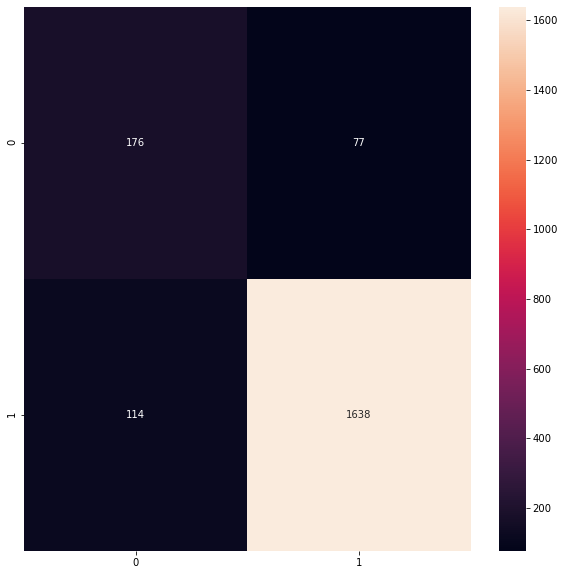

In [26]:
cm_model_dt = confusion_matrix(y_test, y_pred_model_dt)
sns.heatmap(cm_model_dt, annot=True, fmt='1')

> #### Write a review to test the model

In [27]:
example = ['The first time I try to live there, and God willing, the last timeI came around the time of the crowd, the apartments and hotels, and I decided to take them 😭Give us a bridal room 🤣 The sofa is red, Bluetooth speakersThe bed is bad, the air-conditioner is exactly above the bed, its old type, but it killed me with a coldAnd there is an air conditioner above the TV. You imagine air conditioning in a small room ☹️The bathroom is opposite the bed, and the door is closed and does not lockThe bathroom is large and has a jacuzzi, but the drawback is that the sink is very close to the chair (the cabin) with difficulty for one to sit.It has a small fridge and kettleThe room does not have a mirror. How is a bridal room?The room is narrow in the sense of the word, and the poor bride is the one who rents itPictures I tried to adjust too much']
result = model_dt.predict(example)

for i in result:
    if i == 0:
        print("Positive feedback")
  
    else:
        print("Negative feedback")

Negative feedback


* ### Random Forest Classifier

In [28]:
model_rf = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler(sampling_strategy="not majority")), ('classifier', rf)])

model_rf.fit(X_train,y_train)

y_pred_model_rf = model_rf.predict(X_test)

print(accuracy_score(y_test,y_pred_model_rf))
print('\n')
print(classification_report(y_test,y_pred_model_rf))

0.9630922693266832


              precision    recall  f1-score   support

    Negative       0.98      0.72      0.83       253
    Positive       0.96      1.00      0.98      1752

    accuracy                           0.96      2005
   macro avg       0.97      0.86      0.91      2005
weighted avg       0.96      0.96      0.96      2005



<AxesSubplot:>

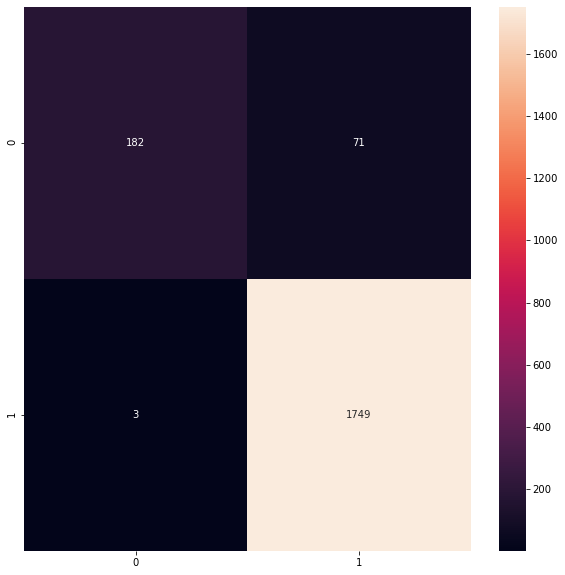

In [29]:
cm_model_rf = confusion_matrix(y_test, y_pred_model_rf)
sns.heatmap(cm_model_rf, annot=True, fmt='1')

> #### Write a review to test the model

In [30]:
example = ['The first time I try to live there, and God willing, the last timeI came around the time of the crowd, the apartments and hotels, and I decided to take them 😭Give us a bridal room 🤣 The sofa is red, Bluetooth speakersThe bed is bad, the air-conditioner is exactly above the bed, its old type, but it killed me with a coldAnd there is an air conditioner above the TV. You imagine air conditioning in a small room ☹️The bathroom is opposite the bed, and the door is closed and does not lockThe bathroom is large and has a jacuzzi, but the drawback is that the sink is very close to the chair (the cabin) with difficulty for one to sit.It has a small fridge and kettleThe room does not have a mirror. How is a bridal room?The room is narrow in the sense of the word, and the poor bride is the one who rents itPictures I tried to adjust too much']
result = model_rf.predict(example)

for i in result:
    if i == 0:
        print("Positive feedback")
  
    else:
        print("Negative feedback")

Negative feedback


* ### Extra Trees Classifier

In [31]:
model_et = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', et)])

model_et.fit(X_train,y_train)

y_pred_model_et = model_et.predict(X_test)

print(accuracy_score(y_test,y_pred_model_et))
print('\n')
print(classification_report(y_test,y_pred_model_et))

0.9336658354114713


              precision    recall  f1-score   support

    Negative       1.00      0.47      0.64       253
    Positive       0.93      1.00      0.96      1752

    accuracy                           0.93      2005
   macro avg       0.96      0.74      0.80      2005
weighted avg       0.94      0.93      0.92      2005



<AxesSubplot:>

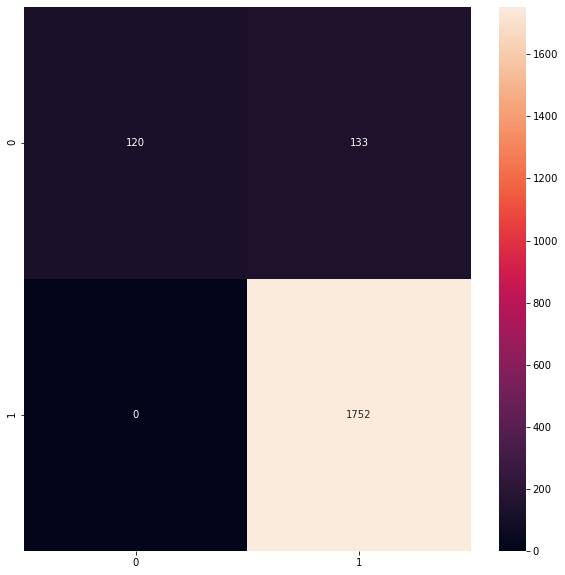

In [32]:
cm_model_et = confusion_matrix(y_test, y_pred_model_et)
sns.heatmap(cm_model_et, annot=True, fmt='1')

> #### Write a review to test the model

In [33]:
example = ['The first time I try to live there, and God willing, the last timeI came around the time of the crowd, the apartments and hotels, and I decided to take them 😭Give us a bridal room 🤣 The sofa is red, Bluetooth speakersThe bed is bad, the air-conditioner is exactly above the bed, its old type, but it killed me with a coldAnd there is an air conditioner above the TV. You imagine air conditioning in a small room ☹️The bathroom is opposite the bed, and the door is closed and does not lockThe bathroom is large and has a jacuzzi, but the drawback is that the sink is very close to the chair (the cabin) with difficulty for one to sit.It has a small fridge and kettleThe room does not have a mirror. How is a bridal room?The room is narrow in the sense of the word, and the poor bride is the one who rents itPictures I tried to adjust too much']
result = model_et.predict(example)

for i in result:
    if i == 0:
        print("Positive feedback")
  
    else:
        print("Negative feedback")

Negative feedback


* ### XGBoost Classifier

In [34]:
model_xgb = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler(sampling_strategy="not majority")), ('classifier', xgbc)])

model_xgb.fit(X_train,y_train)

y_pred_model_xgb = model_xgb.predict(X_test)

print(accuracy_score(y_test,y_pred_model_xgb))
print('\n')
print(classification_report(y_test,y_pred_model_xgb))

[09:30:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9705735660847881


              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88       253
    Positive       0.98      0.99      0.98      1752

    accuracy                           0.97      2005
   macro avg       0.94      0.92      0.93      2005
weighted avg       0.97      0.97      0.97      2005



<AxesSubplot:>

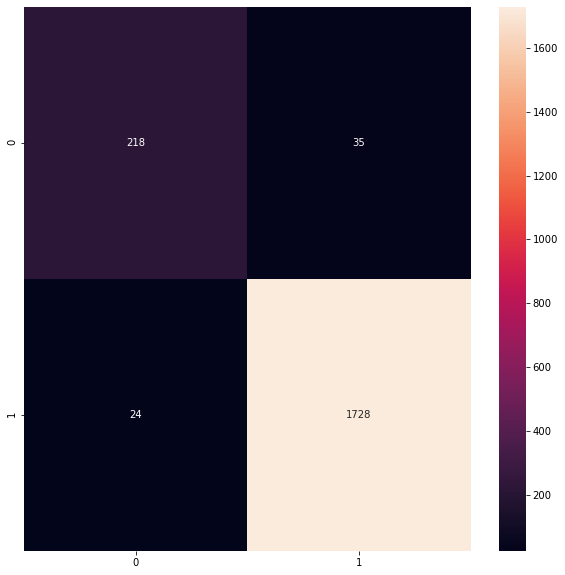

In [35]:
cm_model_xgb = confusion_matrix(y_test, y_pred_model_xgb)
sns.heatmap(cm_model_xgb, annot=True, fmt='1')

> #### Write a review to test the model

In [36]:
example = ['The first time I try to live there, and God willing, the last timeI came around the time of the crowd, the apartments and hotels, and I decided to take them 😭Give us a bridal room 🤣 The sofa is red, Bluetooth speakersThe bed is bad, the air-conditioner is exactly above the bed, its old type, but it killed me with a coldAnd there is an air conditioner above the TV. You imagine air conditioning in a small room ☹️The bathroom is opposite the bed, and the door is closed and does not lockThe bathroom is large and has a jacuzzi, but the drawback is that the sink is very close to the chair (the cabin) with difficulty for one to sit.It has a small fridge and kettleThe room does not have a mirror. How is a bridal room?The room is narrow in the sense of the word, and the poor bride is the one who rents itPictures I tried to adjust too much']
result = model_xgb.predict(example)

for i in result:
    if i == 0:
        print("Positive feedback")
  
    else:
        print("Negative feedback")

Negative feedback


* ### CatBoost Classifier

In [37]:
model_cbc = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', cbc)])

model_cbc.fit(X_train,y_train)

y_pred_model_cbc = model_cbc.predict(X_test)

print(accuracy_score(y_test,y_pred_model_cbc))
print('\n')
print(classification_report(y_test,y_pred_model_cbc))

Learning rate set to 0.031678
0:	learn: 0.6634564	total: 305ms	remaining: 5m 5s
1:	learn: 0.6336814	total: 397ms	remaining: 3m 17s
2:	learn: 0.6093089	total: 489ms	remaining: 2m 42s
3:	learn: 0.5852127	total: 587ms	remaining: 2m 26s
4:	learn: 0.5659834	total: 681ms	remaining: 2m 15s
5:	learn: 0.5457264	total: 775ms	remaining: 2m 8s
6:	learn: 0.5290215	total: 870ms	remaining: 2m 3s
7:	learn: 0.5125619	total: 966ms	remaining: 1m 59s
8:	learn: 0.4955627	total: 1.06s	remaining: 1m 56s
9:	learn: 0.4809225	total: 1.16s	remaining: 1m 54s
10:	learn: 0.4671832	total: 1.25s	remaining: 1m 52s
11:	learn: 0.4533853	total: 1.34s	remaining: 1m 50s
12:	learn: 0.4427182	total: 1.44s	remaining: 1m 49s
13:	learn: 0.4315960	total: 1.53s	remaining: 1m 47s
14:	learn: 0.4215804	total: 1.63s	remaining: 1m 47s
15:	learn: 0.4116805	total: 1.73s	remaining: 1m 46s
16:	learn: 0.4025344	total: 1.82s	remaining: 1m 45s
17:	learn: 0.3940059	total: 1.91s	remaining: 1m 44s
18:	learn: 0.3864425	total: 2.01s	remaining: 1m

157:	learn: 0.1346171	total: 14.9s	remaining: 1m 19s
158:	learn: 0.1341831	total: 15s	remaining: 1m 19s
159:	learn: 0.1335836	total: 15.1s	remaining: 1m 19s
160:	learn: 0.1329886	total: 15.2s	remaining: 1m 19s
161:	learn: 0.1324066	total: 15.3s	remaining: 1m 18s
162:	learn: 0.1318199	total: 15.4s	remaining: 1m 18s
163:	learn: 0.1313884	total: 15.5s	remaining: 1m 18s
164:	learn: 0.1309328	total: 15.5s	remaining: 1m 18s
165:	learn: 0.1304293	total: 15.6s	remaining: 1m 18s
166:	learn: 0.1300169	total: 15.7s	remaining: 1m 18s
167:	learn: 0.1295767	total: 15.8s	remaining: 1m 18s
168:	learn: 0.1291585	total: 15.9s	remaining: 1m 18s
169:	learn: 0.1286517	total: 16s	remaining: 1m 18s
170:	learn: 0.1280917	total: 16.1s	remaining: 1m 18s
171:	learn: 0.1276690	total: 16.2s	remaining: 1m 17s
172:	learn: 0.1272978	total: 16.3s	remaining: 1m 17s
173:	learn: 0.1266436	total: 16.4s	remaining: 1m 17s
174:	learn: 0.1263125	total: 16.5s	remaining: 1m 17s
175:	learn: 0.1258623	total: 16.6s	remaining: 1m 1

315:	learn: 0.0844908	total: 29.4s	remaining: 1m 3s
316:	learn: 0.0841413	total: 29.5s	remaining: 1m 3s
317:	learn: 0.0839216	total: 29.6s	remaining: 1m 3s
318:	learn: 0.0836666	total: 29.7s	remaining: 1m 3s
319:	learn: 0.0836036	total: 29.7s	remaining: 1m 3s
320:	learn: 0.0835797	total: 29.8s	remaining: 1m 3s
321:	learn: 0.0833235	total: 29.9s	remaining: 1m 3s
322:	learn: 0.0833008	total: 30s	remaining: 1m 2s
323:	learn: 0.0832335	total: 30.1s	remaining: 1m 2s
324:	learn: 0.0829664	total: 30.2s	remaining: 1m 2s
325:	learn: 0.0825882	total: 30.3s	remaining: 1m 2s
326:	learn: 0.0825634	total: 30.4s	remaining: 1m 2s
327:	learn: 0.0822961	total: 30.5s	remaining: 1m 2s
328:	learn: 0.0820404	total: 30.6s	remaining: 1m 2s
329:	learn: 0.0817481	total: 30.6s	remaining: 1m 2s
330:	learn: 0.0814775	total: 30.7s	remaining: 1m 2s
331:	learn: 0.0812923	total: 30.8s	remaining: 1m 2s
332:	learn: 0.0810947	total: 30.9s	remaining: 1m 1s
333:	learn: 0.0809552	total: 31s	remaining: 1m 1s
334:	learn: 0.08

476:	learn: 0.0595568	total: 44s	remaining: 48.2s
477:	learn: 0.0594562	total: 44s	remaining: 48.1s
478:	learn: 0.0594337	total: 44.1s	remaining: 48s
479:	learn: 0.0593312	total: 44.2s	remaining: 47.9s
480:	learn: 0.0591136	total: 44.3s	remaining: 47.8s
481:	learn: 0.0591002	total: 44.4s	remaining: 47.7s
482:	learn: 0.0589536	total: 44.5s	remaining: 47.6s
483:	learn: 0.0588203	total: 44.6s	remaining: 47.5s
484:	learn: 0.0587001	total: 44.7s	remaining: 47.5s
485:	learn: 0.0585506	total: 44.8s	remaining: 47.4s
486:	learn: 0.0584092	total: 44.9s	remaining: 47.3s
487:	learn: 0.0581944	total: 45s	remaining: 47.2s
488:	learn: 0.0580558	total: 45.1s	remaining: 47.1s
489:	learn: 0.0579856	total: 45.2s	remaining: 47s
490:	learn: 0.0578698	total: 45.2s	remaining: 46.9s
491:	learn: 0.0577764	total: 45.3s	remaining: 46.8s
492:	learn: 0.0577633	total: 45.4s	remaining: 46.7s
493:	learn: 0.0576561	total: 45.5s	remaining: 46.6s
494:	learn: 0.0575628	total: 45.6s	remaining: 46.5s
495:	learn: 0.0575340	

637:	learn: 0.0455039	total: 58.6s	remaining: 33.3s
638:	learn: 0.0453706	total: 58.7s	remaining: 33.2s
639:	learn: 0.0453623	total: 58.8s	remaining: 33.1s
640:	learn: 0.0453542	total: 58.9s	remaining: 33s
641:	learn: 0.0452312	total: 59s	remaining: 32.9s
642:	learn: 0.0452232	total: 59.1s	remaining: 32.8s
643:	learn: 0.0451234	total: 59.1s	remaining: 32.7s
644:	learn: 0.0451101	total: 59.2s	remaining: 32.6s
645:	learn: 0.0451022	total: 59.3s	remaining: 32.5s
646:	learn: 0.0450608	total: 59.4s	remaining: 32.4s
647:	learn: 0.0450373	total: 59.5s	remaining: 32.3s
648:	learn: 0.0449595	total: 59.6s	remaining: 32.2s
649:	learn: 0.0448307	total: 59.7s	remaining: 32.1s
650:	learn: 0.0448179	total: 59.8s	remaining: 32s
651:	learn: 0.0448100	total: 59.9s	remaining: 32s
652:	learn: 0.0448022	total: 60s	remaining: 31.9s
653:	learn: 0.0446896	total: 1m	remaining: 31.8s
654:	learn: 0.0446770	total: 1m	remaining: 31.7s
655:	learn: 0.0445569	total: 1m	remaining: 31.6s
656:	learn: 0.0445143	total: 1m

798:	learn: 0.0370064	total: 1m 13s	remaining: 18.4s
799:	learn: 0.0369772	total: 1m 13s	remaining: 18.3s
800:	learn: 0.0369266	total: 1m 13s	remaining: 18.2s
801:	learn: 0.0369173	total: 1m 13s	remaining: 18.1s
802:	learn: 0.0368117	total: 1m 13s	remaining: 18s
803:	learn: 0.0367572	total: 1m 13s	remaining: 17.9s
804:	learn: 0.0366917	total: 1m 13s	remaining: 17.9s
805:	learn: 0.0366863	total: 1m 13s	remaining: 17.8s
806:	learn: 0.0365730	total: 1m 13s	remaining: 17.7s
807:	learn: 0.0364936	total: 1m 13s	remaining: 17.6s
808:	learn: 0.0364802	total: 1m 14s	remaining: 17.5s
809:	learn: 0.0364695	total: 1m 14s	remaining: 17.4s
810:	learn: 0.0364641	total: 1m 14s	remaining: 17.3s
811:	learn: 0.0363894	total: 1m 14s	remaining: 17.2s
812:	learn: 0.0363302	total: 1m 14s	remaining: 17.1s
813:	learn: 0.0362390	total: 1m 14s	remaining: 17s
814:	learn: 0.0362337	total: 1m 14s	remaining: 16.9s
815:	learn: 0.0362248	total: 1m 14s	remaining: 16.8s
816:	learn: 0.0361301	total: 1m 14s	remaining: 16.

955:	learn: 0.0307388	total: 1m 27s	remaining: 4.02s
956:	learn: 0.0307329	total: 1m 27s	remaining: 3.93s
957:	learn: 0.0307046	total: 1m 27s	remaining: 3.84s
958:	learn: 0.0306432	total: 1m 27s	remaining: 3.75s
959:	learn: 0.0306394	total: 1m 27s	remaining: 3.66s
960:	learn: 0.0305718	total: 1m 27s	remaining: 3.57s
961:	learn: 0.0304864	total: 1m 27s	remaining: 3.48s
962:	learn: 0.0304825	total: 1m 28s	remaining: 3.38s
963:	learn: 0.0304787	total: 1m 28s	remaining: 3.29s
964:	learn: 0.0304282	total: 1m 28s	remaining: 3.2s
965:	learn: 0.0304244	total: 1m 28s	remaining: 3.11s
966:	learn: 0.0303406	total: 1m 28s	remaining: 3.02s
967:	learn: 0.0303268	total: 1m 28s	remaining: 2.92s
968:	learn: 0.0302514	total: 1m 28s	remaining: 2.83s
969:	learn: 0.0301850	total: 1m 28s	remaining: 2.74s
970:	learn: 0.0301187	total: 1m 28s	remaining: 2.65s
971:	learn: 0.0300624	total: 1m 28s	remaining: 2.56s
972:	learn: 0.0300449	total: 1m 28s	remaining: 2.47s
973:	learn: 0.0299754	total: 1m 29s	remaining: 

<AxesSubplot:>

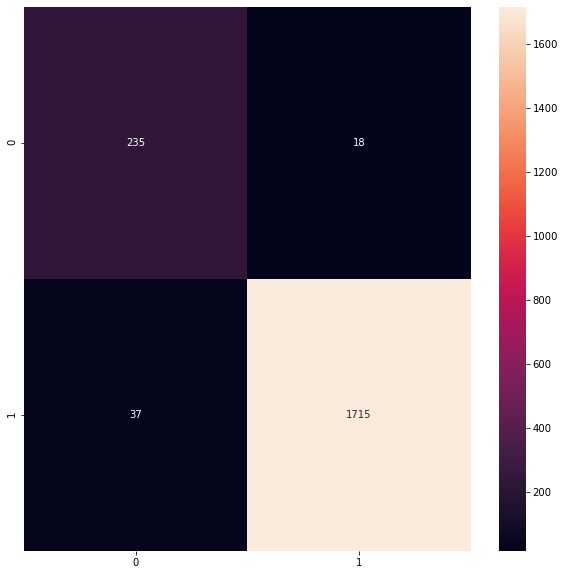

In [38]:
cm_model_cbc = confusion_matrix(y_test, y_pred_model_cbc)
sns.heatmap(cm_model_cbc, annot=True, fmt='1')

> #### Write a review to test the model

In [39]:
example = ['The first time I try to live there, and God willing, the last timeI came around the time of the crowd, the apartments and hotels, and I decided to take them 😭Give us a bridal room 🤣 The sofa is red, Bluetooth speakersThe bed is bad, the air-conditioner is exactly above the bed, its old type, but it killed me with a coldAnd there is an air conditioner above the TV. You imagine air conditioning in a small room ☹️The bathroom is opposite the bed, and the door is closed and does not lockThe bathroom is large and has a jacuzzi, but the drawback is that the sink is very close to the chair (the cabin) with difficulty for one to sit.It has a small fridge and kettleThe room does not have a mirror. How is a bridal room?The room is narrow in the sense of the word, and the poor bride is the one who rents itPictures I tried to adjust too much']
result = model_cbc.predict(example)

for i in result:
    if i == 0:
        print("Positive feedback")
  
    else:
        print("Negative feedback")

Negative feedback


* ### Light Gradient Boosting Machine (LightGBM) Classifier

In [40]:
model_lgbm = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', lgbm)])

model_lgbm.fit(X_train,y_train)

y_pred_model_lgbm = model_lgbm.predict(X_test)

print(accuracy_score(y_test,y_pred_model_lgbm))
print('\n')
print(classification_report(y_test,y_pred_model_lgbm))

0.9755610972568578


              precision    recall  f1-score   support

    Negative       0.90      0.91      0.90       253
    Positive       0.99      0.99      0.99      1752

    accuracy                           0.98      2005
   macro avg       0.94      0.95      0.94      2005
weighted avg       0.98      0.98      0.98      2005



<AxesSubplot:>

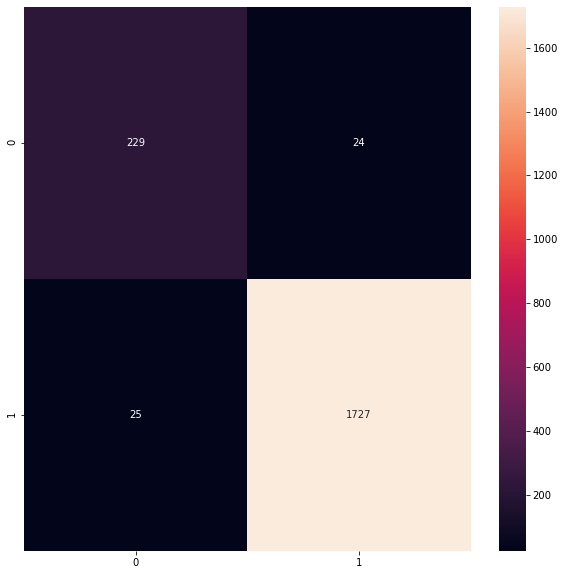

In [41]:
cm_model_lgbm = confusion_matrix(y_test, y_pred_model_lgbm)
sns.heatmap(cm_model_lgbm, annot=True, fmt='1')

> #### Write a review to test the model

In [42]:
example = ['The first time I try to live there, and God willing, the last timeI came around the time of the crowd, the apartments and hotels, and I decided to take them 😭Give us a bridal room 🤣 The sofa is red, Bluetooth speakersThe bed is bad, the air-conditioner is exactly above the bed, its old type, but it killed me with a coldAnd there is an air conditioner above the TV. You imagine air conditioning in a small room ☹️The bathroom is opposite the bed, and the door is closed and does not lockThe bathroom is large and has a jacuzzi, but the drawback is that the sink is very close to the chair (the cabin) with difficulty for one to sit.It has a small fridge and kettleThe room does not have a mirror. How is a bridal room?The room is narrow in the sense of the word, and the poor bride is the one who rents itPictures I tried to adjust too much']
result = model_lgbm.predict(example)

for i in result:
    if i == 0:
        print("Positive feedback")
  
    else:
        print("Negative feedback")

Negative feedback


* ### Multi-Layer Perceptron (MLP) Classifier

In [43]:
model_mlp = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', mlp)])

model_mlp.fit(X_train,y_train)

y_pred_model_mlp = model_mlp.predict(X_test)

print(accuracy_score(y_test,y_pred_model_mlp))
print('\n')
print(classification_report(y_test,y_pred_model_mlp))

0.9865336658354115


              precision    recall  f1-score   support

    Negative       0.96      0.93      0.95       253
    Positive       0.99      0.99      0.99      1752

    accuracy                           0.99      2005
   macro avg       0.97      0.96      0.97      2005
weighted avg       0.99      0.99      0.99      2005



<AxesSubplot:>

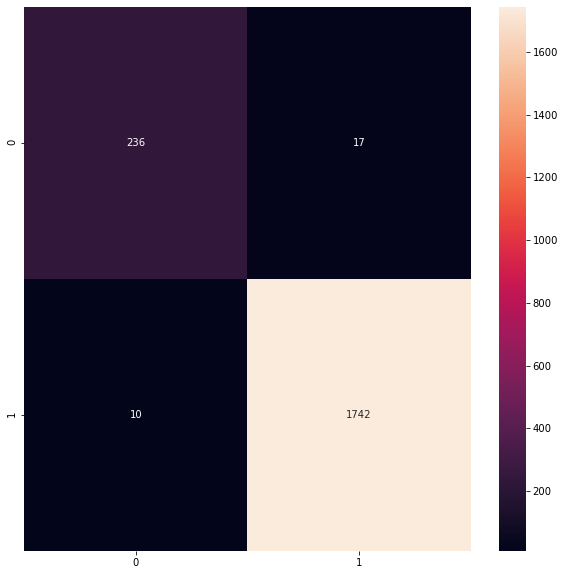

In [44]:
cm_model_mlp = confusion_matrix(y_test, y_pred_model_mlp)
sns.heatmap(cm_model_mlp, annot=True, fmt='1')

> #### Write a review to test the model

In [45]:
example = ['The first time I try to live there, and God willing, the last timeI came around the time of the crowd, the apartments and hotels, and I decided to take them 😭Give us a bridal room 🤣 The sofa is red, Bluetooth speakersThe bed is bad, the air-conditioner is exactly above the bed, its old type, but it killed me with a coldAnd there is an air conditioner above the TV. You imagine air conditioning in a small room ☹️The bathroom is opposite the bed, and the door is closed and does not lockThe bathroom is large and has a jacuzzi, but the drawback is that the sink is very close to the chair (the cabin) with difficulty for one to sit.It has a small fridge and kettleThe room does not have a mirror. How is a bridal room?The room is narrow in the sense of the word, and the poor bride is the one who rents itPictures I tried to adjust too much']
result = model_mlp.predict(example)

for i in result:
    if i == 0:
        print("Positive feedback")
  
    else:
        print("Negative feedback")

Negative feedback


* ### Saving the best supervised model

In [46]:
joblib.dump(model_lr, 'supervised_model.pkl')

['supervised_model.pkl']

----

# **Section 2: Unsupervised Learning**

# **Part 1: K-Means Hyperparameter Tuning**

In [47]:
documents = df_sample['Cleaned_Review'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, random_state=42)
model.fit(features)

df_sample['cluster'] = model.labels_

### Distribution of each rating

In [48]:
df_sample['Sentiment_Unsupervised'] = df_sample['cluster'].apply(lambda x: 'Positive' if x == 0 else 'Negative')

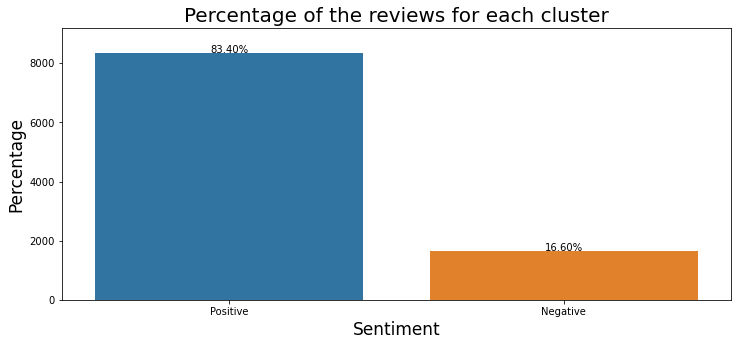

In [49]:
total = len(df_sample)
ax1 = plt.figure(figsize=(12,5))

g = sns.countplot(x='Sentiment_Unsupervised', data=df_sample)
g.set_title("Percentage of the reviews for each cluster", fontsize=20)
g.set_xlabel("Sentiment", fontsize=17)
g.set_ylabel("Percentage", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1);

In [50]:
df_sample['Sentiment_Unsupervised'] .value_counts()

Positive    8358
Negative    1663
Name: Sentiment_Unsupervised, dtype: int64

# **Part 2: Modeling**

### Splitting the data into train dataset and test dataset

In [51]:
X = df_sample.Cleaned_Review
y = df_sample.Sentiment_Unsupervised

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Initializing the models

In [53]:
std_slc = StandardScaler()

tvec = TfidfVectorizer()

knn = KNeighborsClassifier() 

lr = LogisticRegression()

sv = SVC()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

et = ExtraTreesClassifier()

xgbc = xgb.XGBClassifier()

nb = GaussianNB()

cbc = CatBoostClassifier()

lgbm = lgb.LGBMClassifier()

mlp = MLPClassifier(hidden_layer_sizes=(8), max_iter=50, activation = 'relu', solver='adam')

* ### K-Nearest Neighbors (KNN) Classifier

In [54]:
params = { 'classifier__n_neighbors': list(range(1, 20)),'classifier__weights': ['uniform', 'distance']}

steps = [('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', knn)]
pipeline = Pipeline(steps)

knn_rs_u = GridSearchCV(pipeline, param_grid=params, n_jobs = -1)

knn_rs_u.fit(X_train,y_train)

y_pred_knn_rs_u = knn_rs_u.predict(X_test)

print(knn_rs_u.best_score_)
print('\n')
print(knn_rs_u.best_params_)
print('\n')


print(classification_report(y_test, y_pred_knn_rs_u))

0.940494988355686


{'classifier__n_neighbors': 1, 'classifier__weights': 'uniform'}


              precision    recall  f1-score   support

    Negative       0.82      0.86      0.84       340
    Positive       0.97      0.96      0.97      1665

    accuracy                           0.94      2005
   macro avg       0.89      0.91      0.90      2005
weighted avg       0.95      0.94      0.94      2005



<AxesSubplot:>

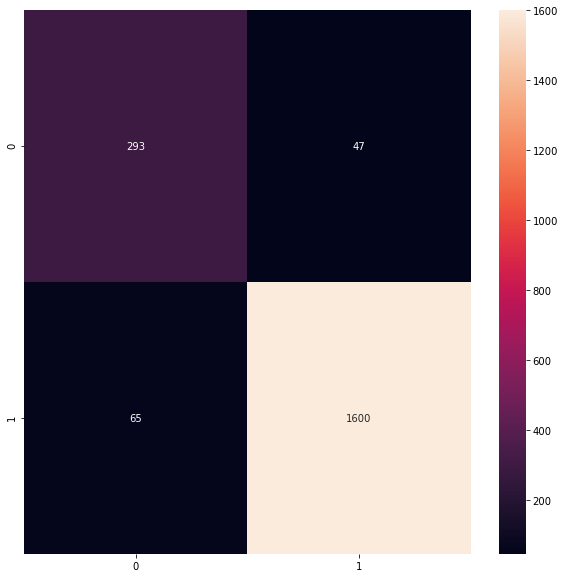

In [55]:
cm_knn_rs_u = confusion_matrix(y_test, y_pred_knn_rs_u)
sns.heatmap(cm_knn_rs_u, annot=True, fmt='1')

* ### Logistic Regression Classifier

In [56]:
model_lr_u = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', lr)])

model_lr_u.fit(X_train, y_train)

y_pred_model_lr_u = model_lr_u.predict(X_test)

print(accuracy_score(y_test,y_pred_model_lr_u))

print(classification_report(y_test,y_pred_model_lr_u))

0.9900249376558603
              precision    recall  f1-score   support

    Negative       0.94      1.00      0.97       340
    Positive       1.00      0.99      0.99      1665

    accuracy                           0.99      2005
   macro avg       0.97      0.99      0.98      2005
weighted avg       0.99      0.99      0.99      2005



<AxesSubplot:>

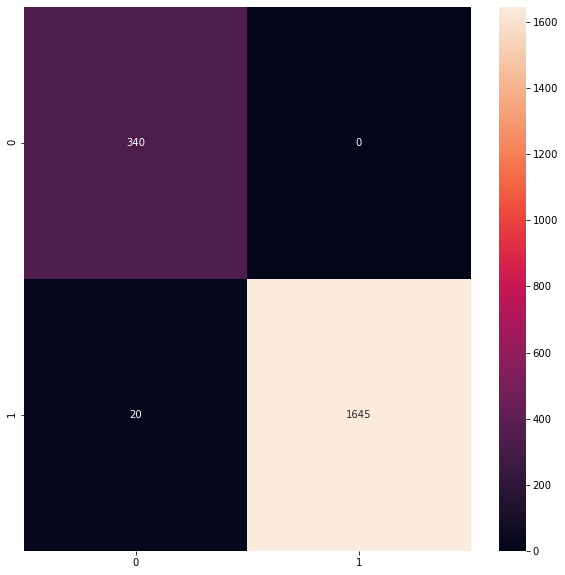

In [57]:
cm_model_lr_u = confusion_matrix(y_test, y_pred_model_lr_u)
sns.heatmap(cm_model_lr_u, annot=True, fmt='1')

* ### Support Vector Classifier

In [58]:
model_SVC_u = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', sv)])

model_SVC_u.fit(X_train,y_train)

y_pred_model_SVC_u = model_SVC_u.predict(X_test)

print(accuracy_score(y_test,y_pred_model_SVC_u))
print('\n')
print(classification_report(y_test,y_pred_model_SVC_u))

0.9885286783042394


              precision    recall  f1-score   support

    Negative       1.00      0.94      0.97       340
    Positive       0.99      1.00      0.99      1665

    accuracy                           0.99      2005
   macro avg       0.99      0.97      0.98      2005
weighted avg       0.99      0.99      0.99      2005



<AxesSubplot:>

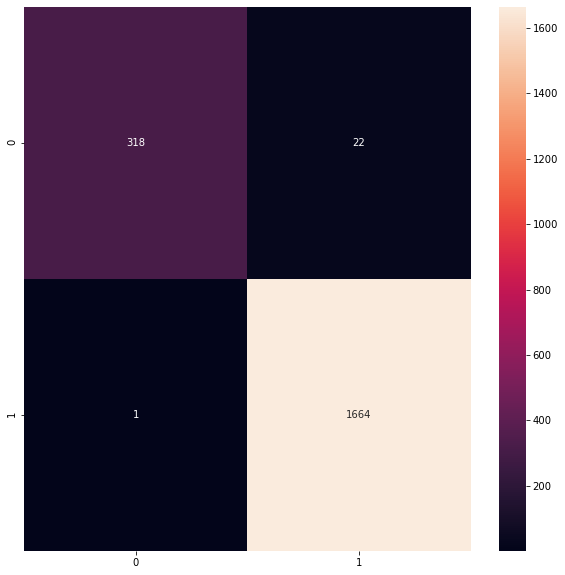

In [59]:
cm_model_SVC_u = confusion_matrix(y_test, y_pred_model_SVC_u)
sns.heatmap(cm_model_SVC_u, annot=True, fmt='1')

* ### Decision Tree Classifier

In [60]:
model_dt_u = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', dt)])

model_dt_u.fit(X_train,y_train)

y_pred_model_dt_u = model_dt_u.predict(X_test)

print(accuracy_score(y_test,y_pred_model_dt_u))
print('\n')
print(classification_report(y_test,y_pred_model_dt_u))

0.9376558603491272


              precision    recall  f1-score   support

    Negative       0.81      0.83      0.82       340
    Positive       0.96      0.96      0.96      1665

    accuracy                           0.94      2005
   macro avg       0.89      0.89      0.89      2005
weighted avg       0.94      0.94      0.94      2005



<AxesSubplot:>

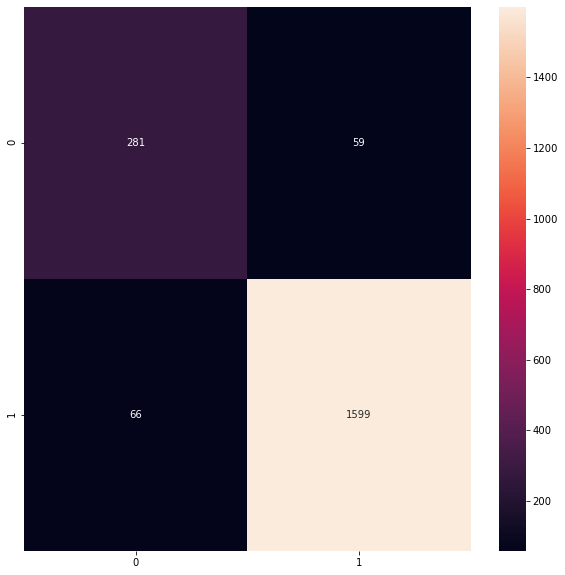

In [61]:
cm_model_dt_u = confusion_matrix(y_test, y_pred_model_dt_u)
sns.heatmap(cm_model_dt_u, annot=True, fmt='1')

* ### Random Forest Classifier

In [62]:
model_rf_u = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler(sampling_strategy="not majority")), ('classifier', rf)])

model_rf_u.fit(X_train,y_train)

y_pred_model_rf_u = model_rf_u.predict(X_test)

print(accuracy_score(y_test,y_pred_model_rf_u))
print('\n')
print(classification_report(y_test,y_pred_model_rf_u))

0.9680798004987531


              precision    recall  f1-score   support

    Negative       0.98      0.83      0.90       340
    Positive       0.97      1.00      0.98      1665

    accuracy                           0.97      2005
   macro avg       0.97      0.91      0.94      2005
weighted avg       0.97      0.97      0.97      2005



<AxesSubplot:>

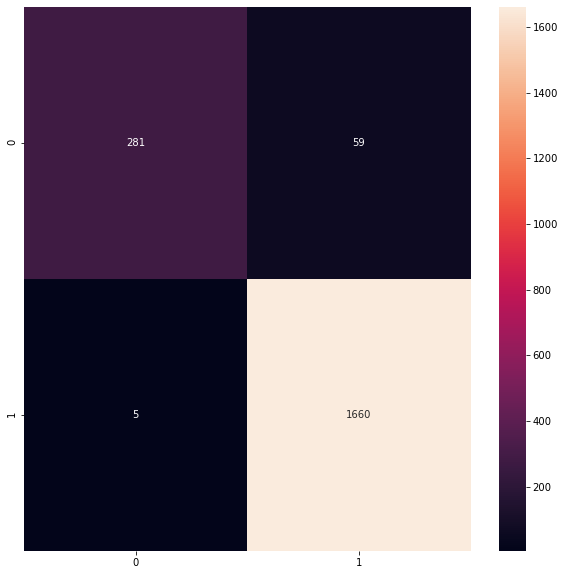

In [63]:
cm_model_rf_u = confusion_matrix(y_test, y_pred_model_rf_u)
sns.heatmap(cm_model_rf_u, annot=True, fmt='1')

* ### Extra Trees Classifier

In [64]:
model_et_u = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', et)])

model_et_u.fit(X_train,y_train)

y_pred_model_et_u = model_et_u.predict(X_test)

print(accuracy_score(y_test,y_pred_model_et_u))
print('\n')
print(classification_report(y_test,y_pred_model_et_u))

0.9571072319201995


              precision    recall  f1-score   support

    Negative       1.00      0.75      0.86       340
    Positive       0.95      1.00      0.97      1665

    accuracy                           0.96      2005
   macro avg       0.97      0.87      0.92      2005
weighted avg       0.96      0.96      0.95      2005



<AxesSubplot:>

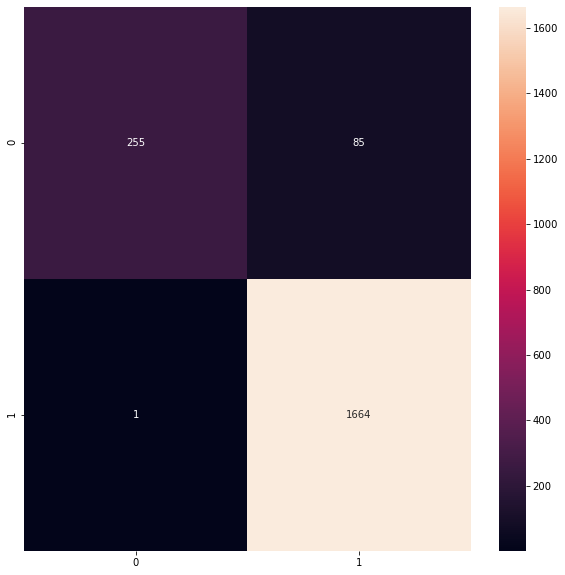

In [65]:
cm_model_et_u = confusion_matrix(y_test, y_pred_model_et_u)
sns.heatmap(cm_model_et_u, annot=True, fmt='1')

* ### XGBoost Classifier

In [66]:
model_xgb_u = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler(sampling_strategy="not majority")), ('classifier', xgbc)])

model_xgb_u.fit(X_train,y_train)

y_pred_model_xgb_u = model_xgb_u.predict(X_test)

print(accuracy_score(y_test,y_pred_model_xgb_u))
print('\n')
print(classification_report(y_test,y_pred_model_xgb_u))

[09:33:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9815461346633416


              precision    recall  f1-score   support

    Negative       0.94      0.95      0.95       340
    Positive       0.99      0.99      0.99      1665

    accuracy                           0.98      2005
   macro avg       0.97      0.97      0.97      2005
weighted avg       0.98      0.98      0.98      2005



<AxesSubplot:>

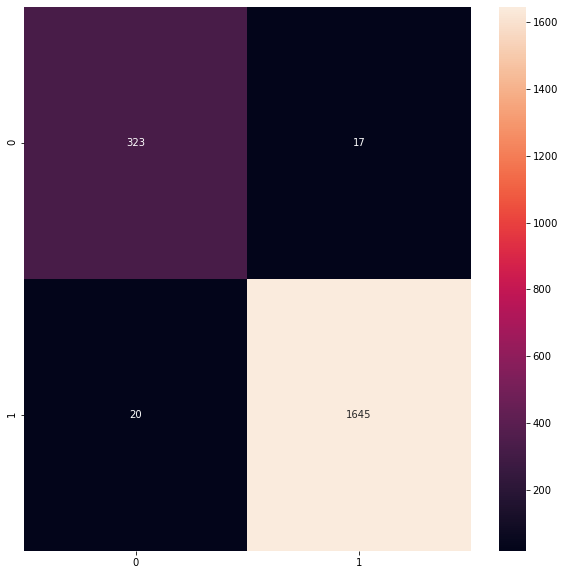

In [67]:
cm_model_xgb_u = confusion_matrix(y_test, y_pred_model_xgb_u)
sns.heatmap(cm_model_xgb_u, annot=True, fmt='1')

* ### CatBoost Classifier

In [68]:
model_cbc_u = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', cbc)])

model_cbc_u.fit(X_train,y_train)

y_pred_model_cbc_u = model_cbc_u.predict(X_test)

print(accuracy_score(y_test,y_pred_model_cbc_u))
print('\n')
print(classification_report(y_test,y_pred_model_cbc_u))

Learning rate set to 0.03119
0:	learn: 0.6491401	total: 145ms	remaining: 2m 25s
1:	learn: 0.6015128	total: 243ms	remaining: 2m 1s
2:	learn: 0.5537120	total: 349ms	remaining: 1m 56s
3:	learn: 0.5137022	total: 443ms	remaining: 1m 50s
4:	learn: 0.4837512	total: 539ms	remaining: 1m 47s
5:	learn: 0.4584089	total: 639ms	remaining: 1m 45s
6:	learn: 0.4305268	total: 737ms	remaining: 1m 44s
7:	learn: 0.4006127	total: 832ms	remaining: 1m 43s
8:	learn: 0.3706381	total: 930ms	remaining: 1m 42s
9:	learn: 0.3488003	total: 1.03s	remaining: 1m 41s
10:	learn: 0.3335654	total: 1.12s	remaining: 1m 40s
11:	learn: 0.3069836	total: 1.22s	remaining: 1m 40s
12:	learn: 0.2893570	total: 1.31s	remaining: 1m 39s
13:	learn: 0.2787278	total: 1.41s	remaining: 1m 39s
14:	learn: 0.2637355	total: 1.5s	remaining: 1m 38s
15:	learn: 0.2522794	total: 1.6s	remaining: 1m 38s
16:	learn: 0.2403600	total: 1.7s	remaining: 1m 38s
17:	learn: 0.2297359	total: 1.79s	remaining: 1m 37s
18:	learn: 0.2224951	total: 1.89s	remaining: 1m 3

157:	learn: 0.0655331	total: 15s	remaining: 1m 20s
158:	learn: 0.0654141	total: 15.1s	remaining: 1m 19s
159:	learn: 0.0653659	total: 15.2s	remaining: 1m 19s
160:	learn: 0.0650391	total: 15.3s	remaining: 1m 19s
161:	learn: 0.0647397	total: 15.4s	remaining: 1m 19s
162:	learn: 0.0645744	total: 15.5s	remaining: 1m 19s
163:	learn: 0.0645459	total: 15.6s	remaining: 1m 19s
164:	learn: 0.0645010	total: 15.7s	remaining: 1m 19s
165:	learn: 0.0643895	total: 15.8s	remaining: 1m 19s
166:	learn: 0.0641535	total: 15.9s	remaining: 1m 19s
167:	learn: 0.0638088	total: 16s	remaining: 1m 19s
168:	learn: 0.0637206	total: 16s	remaining: 1m 18s
169:	learn: 0.0636985	total: 16.1s	remaining: 1m 18s
170:	learn: 0.0633845	total: 16.2s	remaining: 1m 18s
171:	learn: 0.0629748	total: 16.3s	remaining: 1m 18s
172:	learn: 0.0626505	total: 16.4s	remaining: 1m 18s
173:	learn: 0.0625380	total: 16.5s	remaining: 1m 18s
174:	learn: 0.0624785	total: 16.6s	remaining: 1m 18s
175:	learn: 0.0624292	total: 16.7s	remaining: 1m 18s

314:	learn: 0.0474189	total: 29.5s	remaining: 1m 4s
315:	learn: 0.0473261	total: 29.6s	remaining: 1m 4s
316:	learn: 0.0473110	total: 29.7s	remaining: 1m 4s
317:	learn: 0.0471509	total: 29.8s	remaining: 1m 3s
318:	learn: 0.0471205	total: 29.9s	remaining: 1m 3s
319:	learn: 0.0470915	total: 30s	remaining: 1m 3s
320:	learn: 0.0468199	total: 30.1s	remaining: 1m 3s
321:	learn: 0.0466823	total: 30.2s	remaining: 1m 3s
322:	learn: 0.0466651	total: 30.3s	remaining: 1m 3s
323:	learn: 0.0466495	total: 30.4s	remaining: 1m 3s
324:	learn: 0.0466255	total: 30.5s	remaining: 1m 3s
325:	learn: 0.0466098	total: 30.6s	remaining: 1m 3s
326:	learn: 0.0464551	total: 30.7s	remaining: 1m 3s
327:	learn: 0.0463614	total: 30.8s	remaining: 1m 3s
328:	learn: 0.0463400	total: 30.9s	remaining: 1m 2s
329:	learn: 0.0463208	total: 30.9s	remaining: 1m 2s
330:	learn: 0.0463060	total: 31s	remaining: 1m 2s
331:	learn: 0.0460868	total: 31.1s	remaining: 1m 2s
332:	learn: 0.0459467	total: 31.2s	remaining: 1m 2s
333:	learn: 0.04

476:	learn: 0.0348726	total: 44.5s	remaining: 48.8s
477:	learn: 0.0348581	total: 44.6s	remaining: 48.7s
478:	learn: 0.0348379	total: 44.7s	remaining: 48.6s
479:	learn: 0.0348239	total: 44.8s	remaining: 48.5s
480:	learn: 0.0347617	total: 44.9s	remaining: 48.4s
481:	learn: 0.0347472	total: 45s	remaining: 48.3s
482:	learn: 0.0347030	total: 45s	remaining: 48.2s
483:	learn: 0.0346941	total: 45.1s	remaining: 48.1s
484:	learn: 0.0345728	total: 45.2s	remaining: 48s
485:	learn: 0.0345587	total: 45.3s	remaining: 47.9s
486:	learn: 0.0343890	total: 45.4s	remaining: 47.8s
487:	learn: 0.0343802	total: 45.5s	remaining: 47.7s
488:	learn: 0.0343220	total: 45.6s	remaining: 47.6s
489:	learn: 0.0343025	total: 45.7s	remaining: 47.5s
490:	learn: 0.0342036	total: 45.8s	remaining: 47.5s
491:	learn: 0.0341898	total: 45.9s	remaining: 47.4s
492:	learn: 0.0341812	total: 45.9s	remaining: 47.3s
493:	learn: 0.0339881	total: 46s	remaining: 47.2s
494:	learn: 0.0338868	total: 46.1s	remaining: 47.1s
495:	learn: 0.033789

635:	learn: 0.0271523	total: 59s	remaining: 33.8s
636:	learn: 0.0271467	total: 59.1s	remaining: 33.7s
637:	learn: 0.0270514	total: 59.2s	remaining: 33.6s
638:	learn: 0.0270459	total: 59.3s	remaining: 33.5s
639:	learn: 0.0269531	total: 59.4s	remaining: 33.4s
640:	learn: 0.0269065	total: 59.5s	remaining: 33.3s
641:	learn: 0.0268301	total: 59.6s	remaining: 33.2s
642:	learn: 0.0268183	total: 59.7s	remaining: 33.1s
643:	learn: 0.0268091	total: 59.8s	remaining: 33s
644:	learn: 0.0268000	total: 59.8s	remaining: 32.9s
645:	learn: 0.0267946	total: 59.9s	remaining: 32.8s
646:	learn: 0.0267126	total: 1m	remaining: 32.8s
647:	learn: 0.0266751	total: 1m	remaining: 32.7s
648:	learn: 0.0266307	total: 1m	remaining: 32.6s
649:	learn: 0.0265516	total: 1m	remaining: 32.5s
650:	learn: 0.0264499	total: 1m	remaining: 32.4s
651:	learn: 0.0264445	total: 1m	remaining: 32.3s
652:	learn: 0.0264392	total: 1m	remaining: 32.2s
653:	learn: 0.0263821	total: 1m	remaining: 32.1s
654:	learn: 0.0263247	total: 1m	remainin

795:	learn: 0.0219924	total: 1m 13s	remaining: 18.9s
796:	learn: 0.0219858	total: 1m 13s	remaining: 18.8s
797:	learn: 0.0219820	total: 1m 13s	remaining: 18.7s
798:	learn: 0.0219258	total: 1m 14s	remaining: 18.6s
799:	learn: 0.0219220	total: 1m 14s	remaining: 18.5s
800:	learn: 0.0219155	total: 1m 14s	remaining: 18.4s
801:	learn: 0.0218855	total: 1m 14s	remaining: 18.4s
802:	learn: 0.0218817	total: 1m 14s	remaining: 18.3s
803:	learn: 0.0217894	total: 1m 14s	remaining: 18.2s
804:	learn: 0.0217429	total: 1m 14s	remaining: 18.1s
805:	learn: 0.0217391	total: 1m 14s	remaining: 18s
806:	learn: 0.0217312	total: 1m 14s	remaining: 17.9s
807:	learn: 0.0217275	total: 1m 14s	remaining: 17.8s
808:	learn: 0.0217195	total: 1m 14s	remaining: 17.7s
809:	learn: 0.0217131	total: 1m 15s	remaining: 17.6s
810:	learn: 0.0217094	total: 1m 15s	remaining: 17.5s
811:	learn: 0.0216193	total: 1m 15s	remaining: 17.4s
812:	learn: 0.0215806	total: 1m 15s	remaining: 17.3s
813:	learn: 0.0215548	total: 1m 15s	remaining: 1

951:	learn: 0.0184235	total: 1m 28s	remaining: 4.45s
952:	learn: 0.0184179	total: 1m 28s	remaining: 4.35s
953:	learn: 0.0184152	total: 1m 28s	remaining: 4.26s
954:	learn: 0.0183969	total: 1m 28s	remaining: 4.17s
955:	learn: 0.0183942	total: 1m 28s	remaining: 4.07s
956:	learn: 0.0183890	total: 1m 28s	remaining: 3.98s
957:	learn: 0.0183545	total: 1m 28s	remaining: 3.89s
958:	learn: 0.0183166	total: 1m 28s	remaining: 3.8s
959:	learn: 0.0183139	total: 1m 28s	remaining: 3.7s
960:	learn: 0.0183112	total: 1m 28s	remaining: 3.61s
961:	learn: 0.0183063	total: 1m 29s	remaining: 3.52s
962:	learn: 0.0183036	total: 1m 29s	remaining: 3.42s
963:	learn: 0.0182927	total: 1m 29s	remaining: 3.33s
964:	learn: 0.0182480	total: 1m 29s	remaining: 3.24s
965:	learn: 0.0182198	total: 1m 29s	remaining: 3.15s
966:	learn: 0.0182151	total: 1m 29s	remaining: 3.05s
967:	learn: 0.0181703	total: 1m 29s	remaining: 2.96s
968:	learn: 0.0181654	total: 1m 29s	remaining: 2.87s
969:	learn: 0.0181627	total: 1m 29s	remaining: 2

<AxesSubplot:>

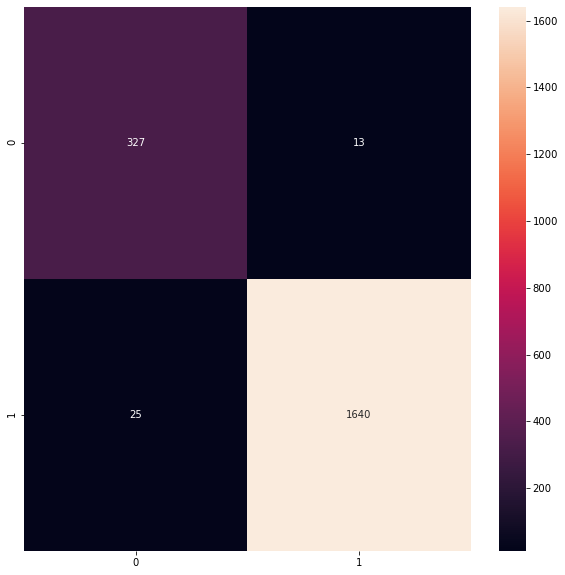

In [69]:
cm_model_cbc_u = confusion_matrix(y_test, y_pred_model_cbc_u)
sns.heatmap(cm_model_cbc_u, annot=True, fmt='1')

* ### Light Gradient Boosting Machine (LightGBM) Classifier

In [70]:
model_lgbm_u = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', lgbm)])

model_lgbm_u.fit(X_train,y_train)

y_pred_model_lgbm_u = model_lgbm_u.predict(X_test)

print(accuracy_score(y_test,y_pred_model_lgbm_u))
print('\n')
print(classification_report(y_test,y_pred_model_lgbm_u))

0.9815461346633416


              precision    recall  f1-score   support

    Negative       0.94      0.95      0.95       340
    Positive       0.99      0.99      0.99      1665

    accuracy                           0.98      2005
   macro avg       0.96      0.97      0.97      2005
weighted avg       0.98      0.98      0.98      2005



<AxesSubplot:>

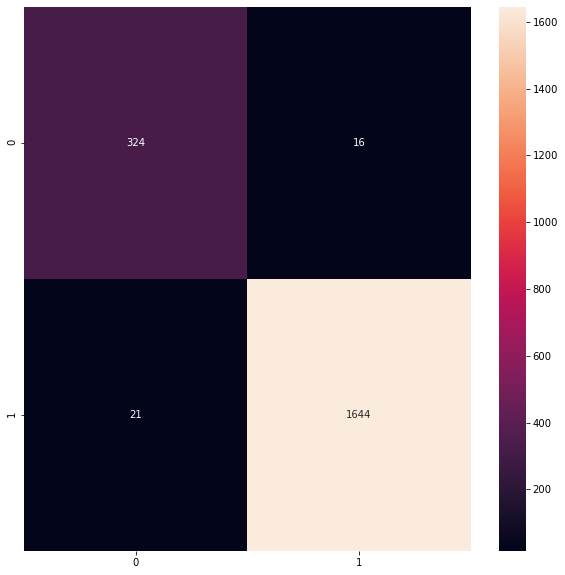

In [71]:
cm_model_lgbm_u = confusion_matrix(y_test, y_pred_model_lgbm_u)
sns.heatmap(cm_model_lgbm_u, annot=True, fmt='1')

* ### Multi-Layer Perceptron (MLP) Classifier

In [72]:
model_mlp_u = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', mlp)])

model_mlp_u.fit(X_train,y_train)

y_pred_model_mlp_u = model_mlp_u.predict(X_test)

print(accuracy_score(y_test,y_pred_model_mlp_u))
print('\n')
print(classification_report(y_test,y_pred_model_mlp_u))

0.9730673316708229


              precision    recall  f1-score   support

    Negative       0.93      0.91      0.92       340
    Positive       0.98      0.99      0.98      1665

    accuracy                           0.97      2005
   macro avg       0.96      0.95      0.95      2005
weighted avg       0.97      0.97      0.97      2005



<AxesSubplot:>

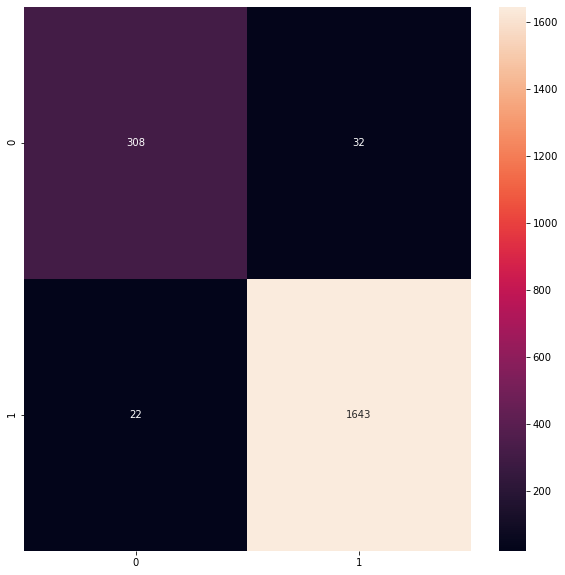

In [73]:
cm_model_mlp_u = confusion_matrix(y_test, y_pred_model_mlp_u)
sns.heatmap(cm_model_mlp_u, annot=True, fmt='1')

* ### Saving the best unsupervised model

In [74]:
joblib.dump(model_lr, 'unsupervised_model.pkl')

['unsupervised_model.pkl']